# Nurul Alam
# MSc in Data Science
# Applied Sciences University, Germany

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [3]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [4]:
X_train, y_train = train['features'], train['labels']
X_validation, y_validation = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

In [5]:
X_train.shape

(34799, 32, 32, 3)

In [6]:
y_train.shape

(34799,)

In [7]:
X_validation.shape

(4410, 32, 32, 3)

In [8]:
y_validation.shape

(4410,)

In [9]:
X_test.shape

(12630, 32, 32, 3)

In [10]:
y_test.shape

(12630,)

In [11]:
X_train

array([[[[ 28,  25,  24],
         [ 27,  24,  23],
         [ 27,  24,  22],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  25],
         [ 31,  27,  26]],

        [[ 29,  26,  25],
         [ 27,  25,  23],
         [ 27,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        [[ 28,  26,  26],
         [ 27,  25,  23],
         [ 26,  25,  23],
         ...,
         [ 32,  28,  24],
         [ 31,  27,  24],
         [ 30,  27,  25]],

        ...,

        [[ 27,  24,  23],
         [ 28,  25,  24],
         [ 30,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 29,  25,  22]],

        [[ 28,  23,  23],
         [ 29,  24,  24],
         [ 31,  25,  24],
         ...,
         [ 27,  24,  23],
         [ 28,  24,  22],
         [ 28,  24,  21]],

        [[ 29,  23,  23],
         [ 30,  24,  24],
         [ 32,  24,  23],
         ...,
         [ 27,  24,  22],
        

In [12]:
y_train

array([41, 41, 41, ..., 25, 25, 25], dtype=uint8)

# Explore The Images

1

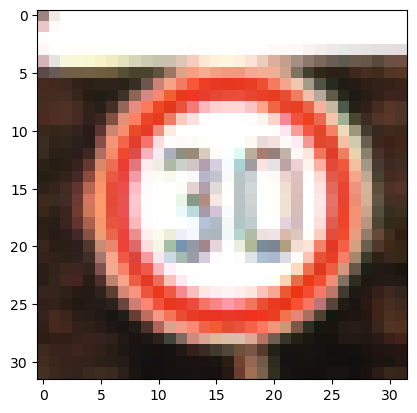

In [13]:
i = 3000
plt.imshow(X_train[i])
y_train[i]

38

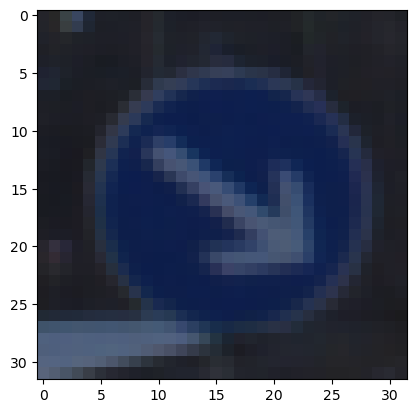

In [14]:
i = 2000
plt.imshow(X_validation[i])
y_validation[i]

2

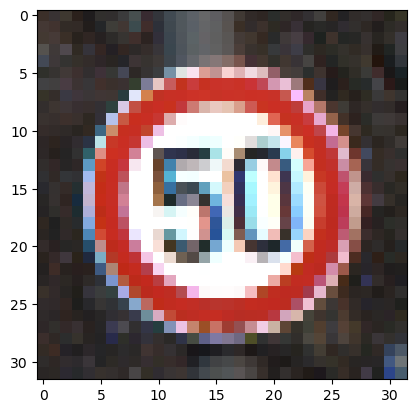

In [15]:
i = 1500
plt.imshow(X_test[i])
y_test[i]

# Data Preparation

In [16]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

In [17]:
X_train_gray = np.sum(X_train/3, axis = 3, keepdims = True)
X_validation_gray = np.sum(X_validation/3, axis = 3, keepdims = True)
X_test_gray = np.sum(X_test/3, axis = 3, keepdims = True)

In [19]:
X_train_gray.shape

(34799, 32, 32, 1)

In [21]:
X_validation_gray.shape

(4410, 32, 32, 1)

In [23]:
X_test_gray.shape

(12630, 32, 32, 1)

In [24]:
X_train_gray_norm = (X_train_gray - 128)/128
X_validation_gray_norm = (X_validation_gray - 128)/128
X_test_gray_norm = (X_test_gray - 128)/128

In [25]:
X_train_gray_norm

array([[[[-0.62760417],
         [-0.62239583],
         [-0.56770833],
         ...,
         [-0.53125   ],
         [-0.50260417],
         [-0.54427083]],

        [[-0.66666667],
         [-0.6484375 ],
         [-0.5703125 ],
         ...,
         [-0.51822917],
         [-0.54427083],
         [-0.56510417]],

        [[-0.62760417],
         [-0.58854167],
         [-0.56770833],
         ...,
         [-0.65885417],
         [-0.67447917],
         [-0.64583333]],

        ...,

        [[-0.53385417],
         [-0.56770833],
         [-0.640625  ],
         ...,
         [-0.73177083],
         [-0.72135417],
         [-0.6953125 ]],

        [[-0.51041667],
         [-0.54947917],
         [-0.65625   ],
         ...,
         [-0.75260417],
         [-0.703125  ],
         [-0.6640625 ]],

        [[-0.46875   ],
         [-0.515625  ],
         [-0.64322917],
         ...,
         [-0.72395833],
         [-0.71875   ],
         [-0.69791667]]],


       [[[-0.76302083],


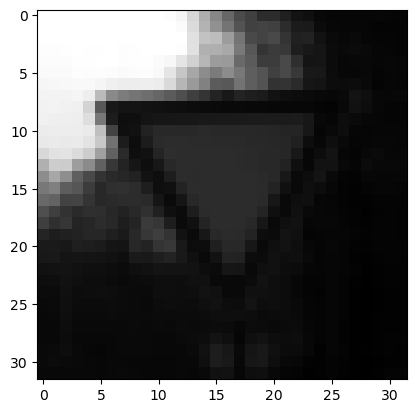

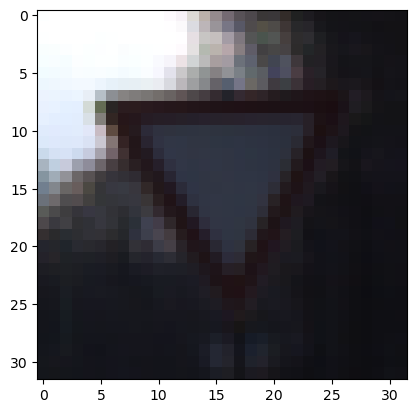

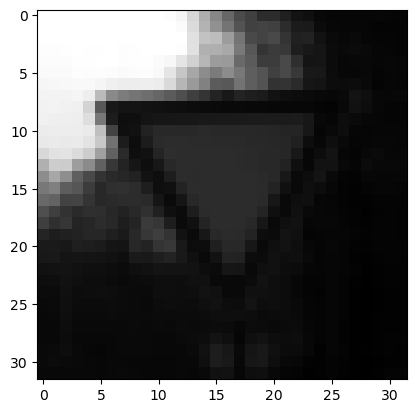

In [28]:
i = 610
plt.imshow(X_train_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_train[i])
plt.figure()
plt.imshow(X_train_gray_norm[i].squeeze(), cmap = 'gray')

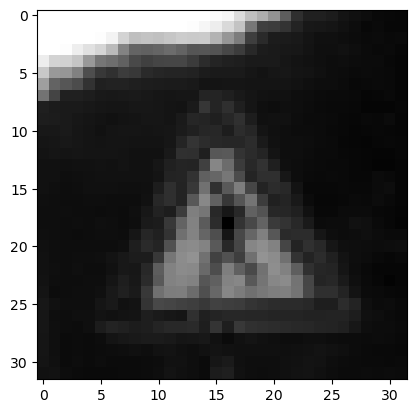

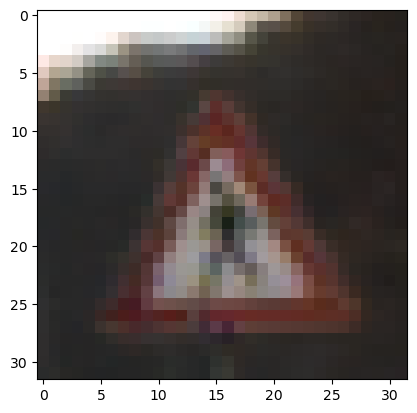

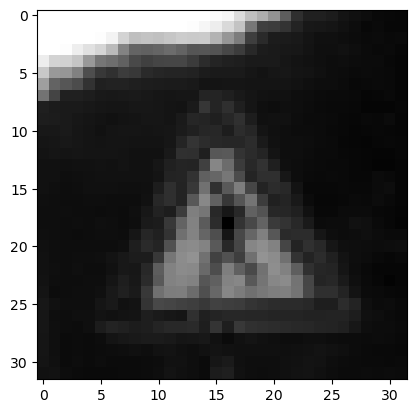

In [29]:
i = 610
plt.imshow(X_test_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_test[i])
plt.figure()
plt.imshow(X_test_gray_norm[i].squeeze(), cmap = 'gray')

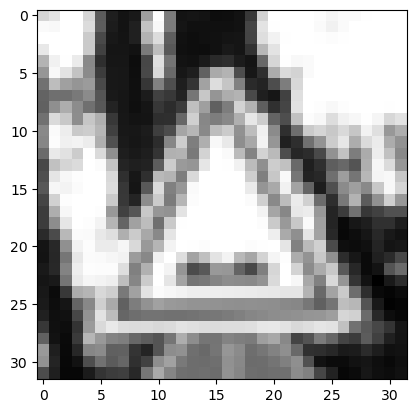

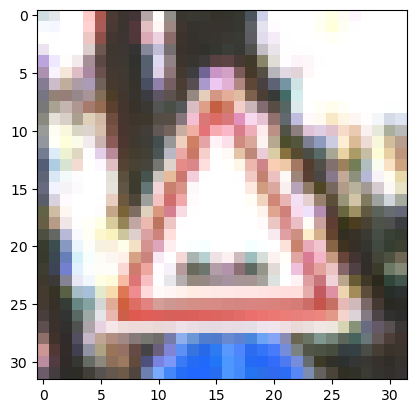

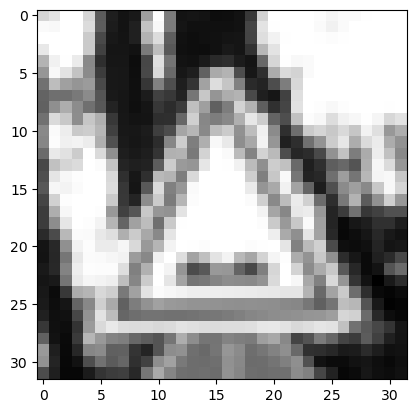

In [30]:
i = 610
plt.imshow(X_validation_gray[i].squeeze(), cmap = 'gray')
plt.figure()
plt.imshow(X_validation[i])
plt.figure()
plt.imshow(X_validation_gray_norm[i].squeeze(), cmap = 'gray')

# Model Training

In [32]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

2025-07-23 12:40:13.682401: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [54]:
cnn_model = Sequential()
cnn_model.add(Conv2D(filters = 6, kernel_size=(5, 5), activation = 'relu', input_shape = (32, 32,1)))
cnn_model.add(AveragePooling2D(pool_size = (2, 2)))

cnn_model.add(Conv2D(filters = 16, kernel_size=(5, 5), activation = 'relu'))
cnn_model.add(AveragePooling2D(pool_size=(2, 2)))

cnn_model.add(Flatten())
cnn_model.add(Dense(units = 120, activation = 'relu'))
cnn_model.add(Dense(units = 84, activation = 'relu'))
cnn_model.add(Dense(units = 43, activation = 'softmax'))

In [55]:
cnn_model.compile(loss = 'sparse_categorical_crossentropy', optimizer = Adam(learning_rate = 0.001), metrics = ['accuracy'] )

In [57]:
history = cnn_model.fit(
    X_train_gray_norm,
    y_train,
    batch_size=500,  # Consider reducing if memory issues occur
    epochs=50,
    verbose=1,
    validation_data=(X_validation_gray_norm, y_validation)
)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 70ms/step - accuracy: 0.1365 - loss: 3.1856 - val_accuracy: 0.1331 - val_loss: 3.3018
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 5s 69ms/step - accuracy: 0.1751 - loss: 2.9493 - val_accuracy: 0.1914 - val_loss: 3.0290
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.2476 - loss: 2.6274 - val_accuracy: 0.2522 - val_loss: 2.6797
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.3415 - loss: 2.2609 - val_accuracy: 0.3254 - val_loss: 2.3803
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 57ms/step - accuracy: 0.4255 - loss: 1.9527 - val_accuracy: 0.3957 - val_loss: 2.1410
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.4969 - loss: 1.7061 - val_accuracy: 0.4392 - val_loss: 1.9487
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 61ms/step - accuracy: 0.5452 - loss: 1.5379 - val_accuracy: 0.4580 - val_loss: 1.8383
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 4s 60ms/step - accuracy: 0.5855 - loss: 1.3988 - val_accuracy: 0.4837 - v

# Model Evaluation

In [58]:
score = cnn_model.evaluate(X_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.3992 - loss: 398.1541
Test Accuracy: 0.3928741216659546


In [59]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [60]:
accuracy = history.history['accuracy']
loss = history.history['loss']
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']

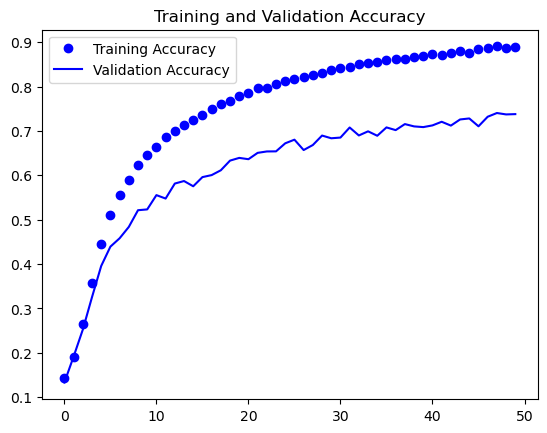

In [63]:
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

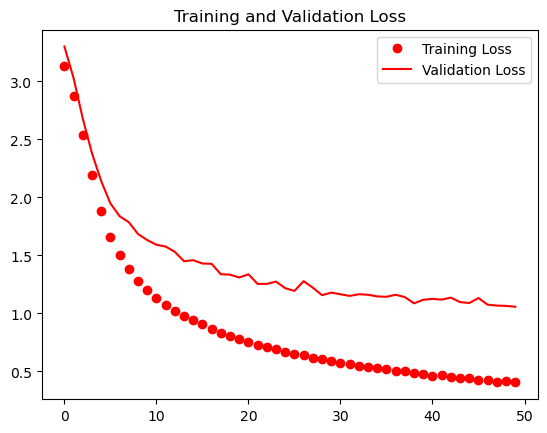

In [64]:
plt.plot(epochs, loss, 'ro', label = 'Training Loss')
plt.plot(epochs, val_loss, 'r', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

In [67]:
predicted_classes = cnn_model.predict(X_test_gray_norm)
y_true = y_test

395/395 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step


<Axes: >

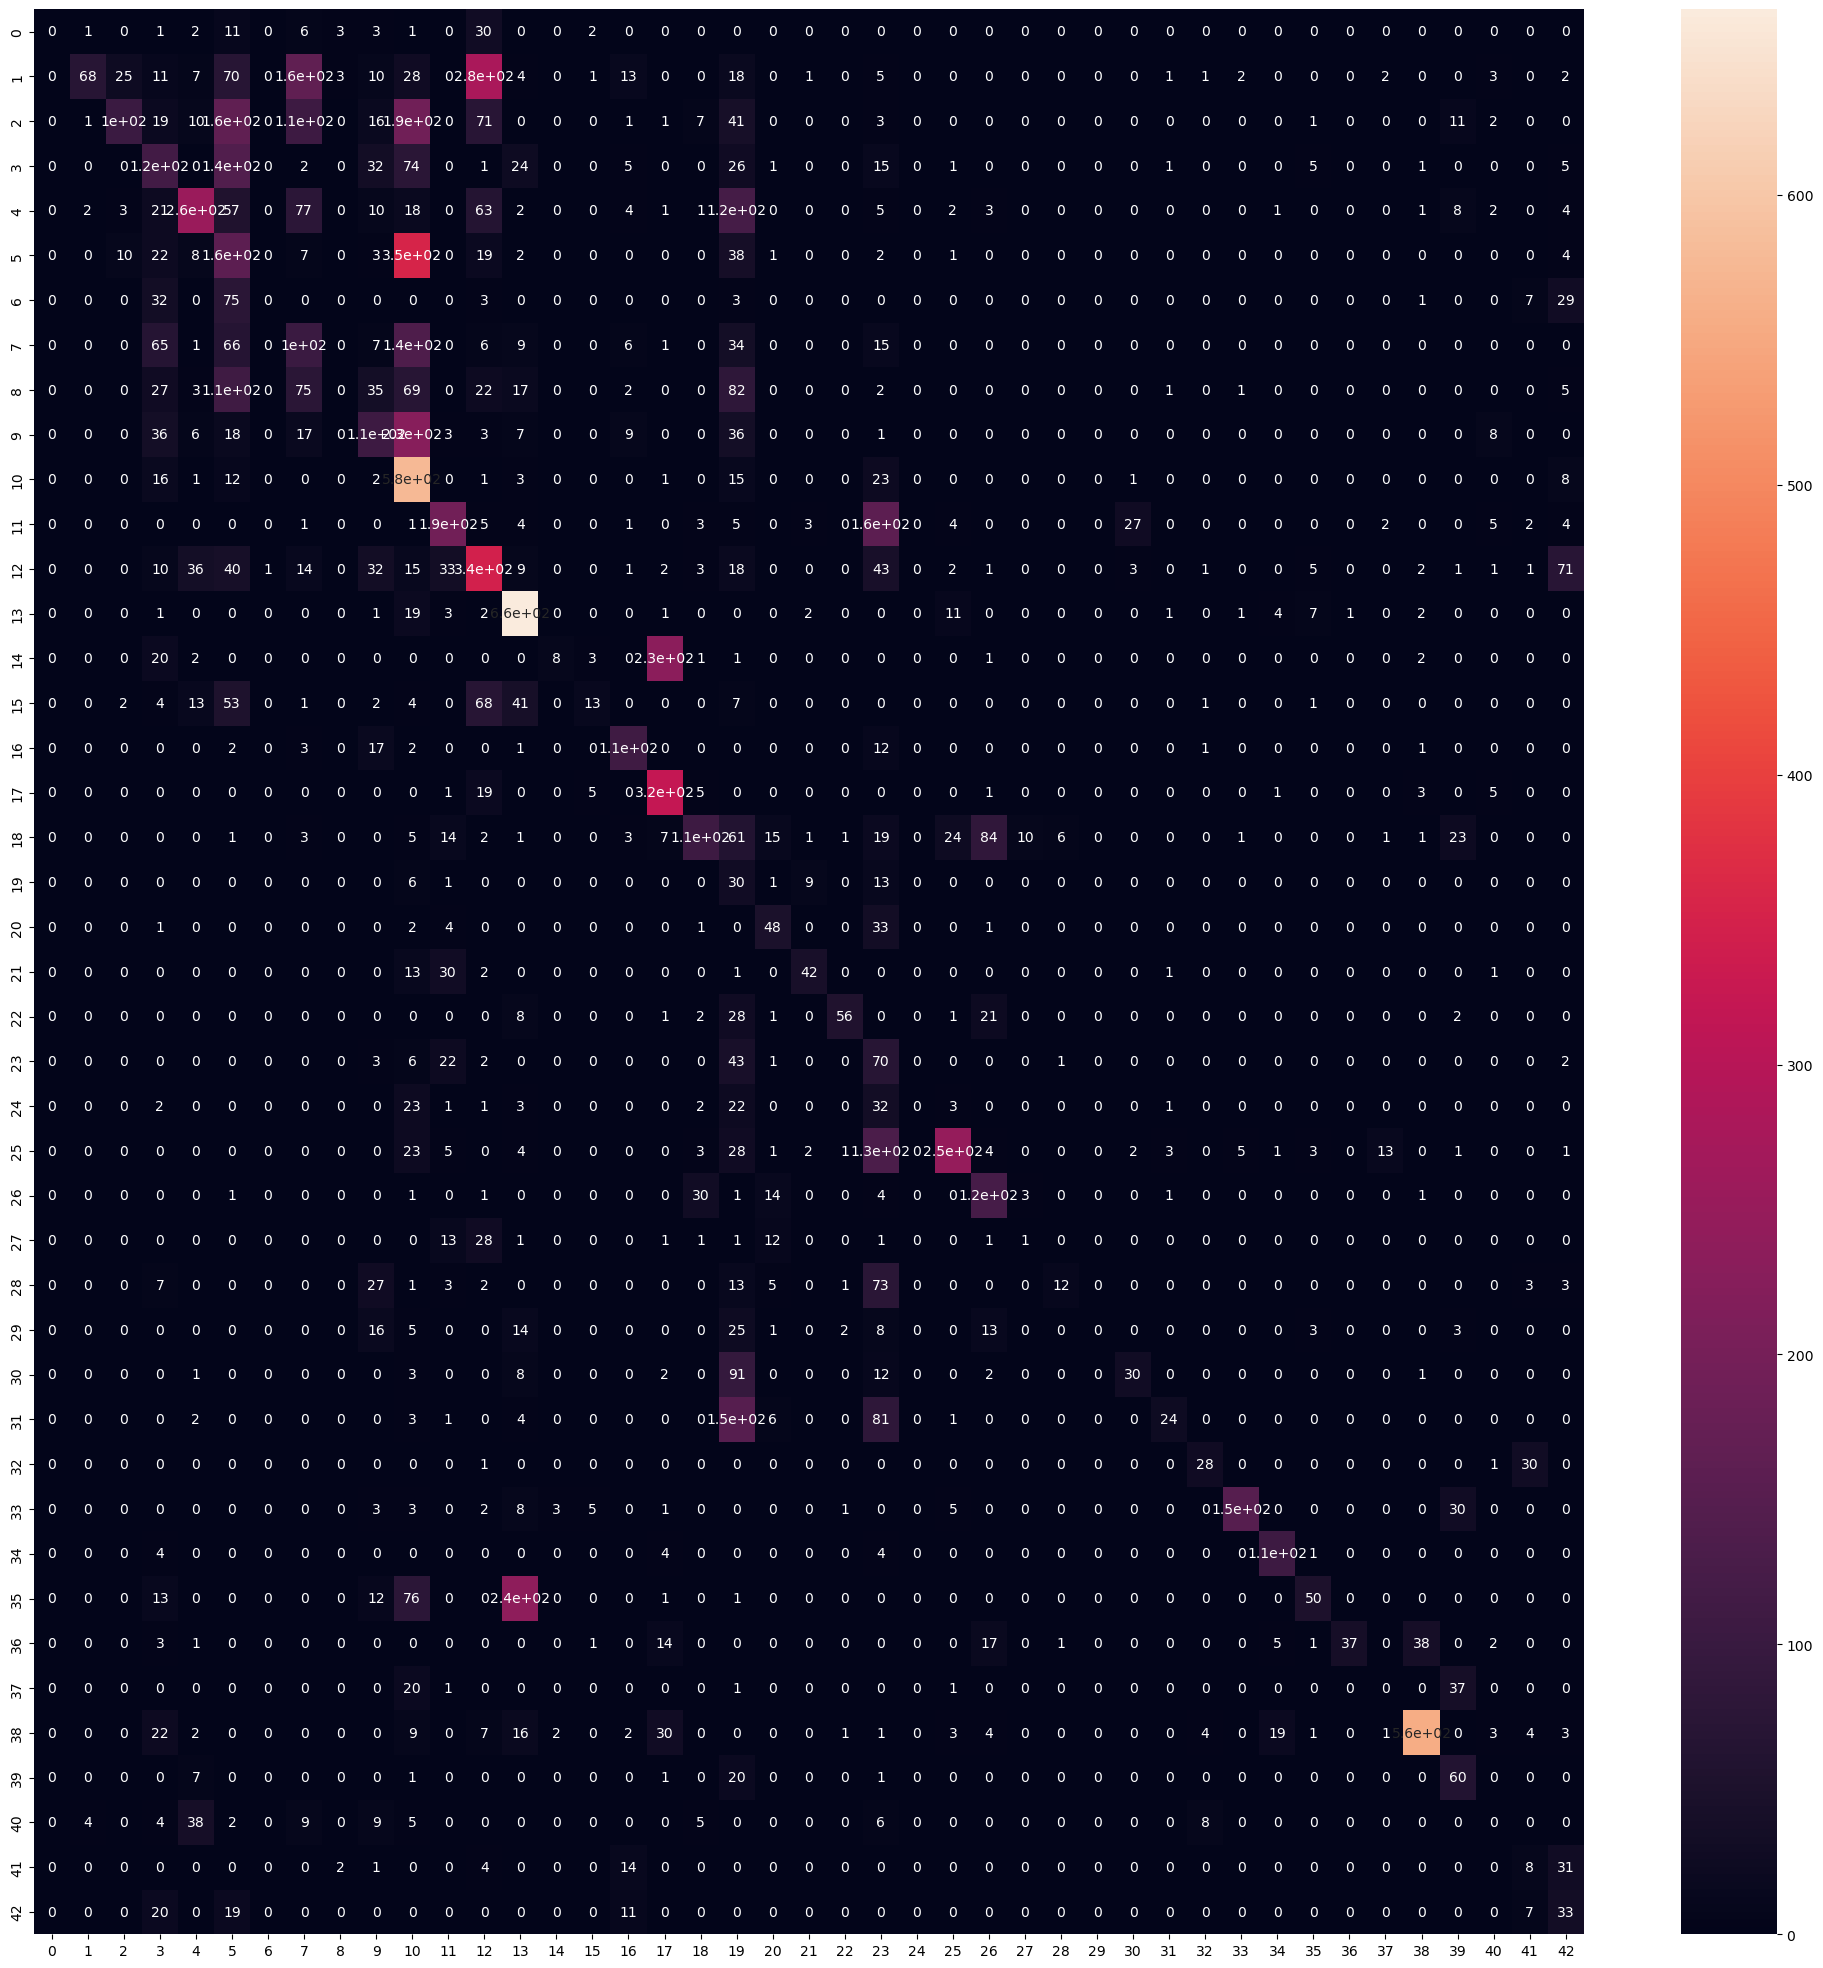

In [73]:
from sklearn.metrics import confusion_matrix
#cm = confusion_matrix(y_true, predicted_classes)
#sns.heatmap(cm, annot = True)

predicted_classes_fixed = np.argmax(predicted_classes, axis=1)  # If using one-hot encoded or probability outputs
# OR
# predicted_classes_fixed = (predicted_classes > 0.5).astype(int)  # If using binary classification with threshold

# Make sure both inputs are of the same format (integers representing class labels)
cm = confusion_matrix(y_true, predicted_classes_fixed)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot=True)

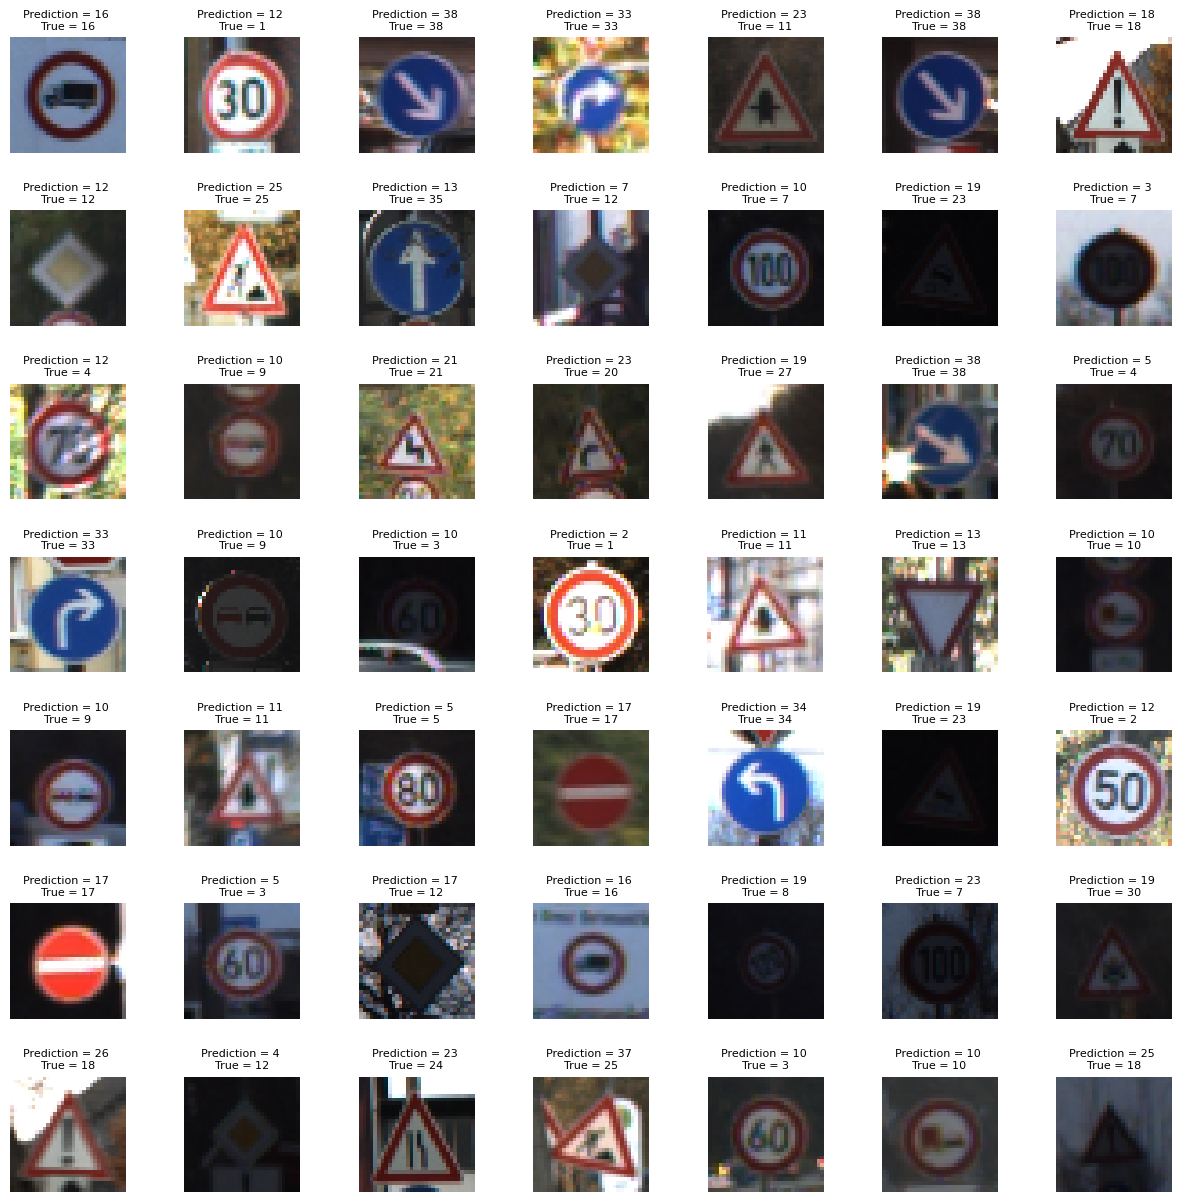

In [94]:
L = 7
W = 7

fig, axes = plt.subplots(L, W, figsize = (15, 15))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Prediction = {} \nTrue = {}'.format(predicted_classes_fixed[i], y_true[i]), fontsize=8)

    axes[i].axis('Off')

plt.subplots_adjust(wspace=0.5, hspace=0.5)